In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Excercise 9
Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? Try again with an SGDClassifier. How much does PCA help now?

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=True)
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

In [4]:
from sklearn.ensemble import RandomForestClassifier

rnf_clf1 = RandomForestClassifier(random_state=42)
rnf_clf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
from sklearn.metrics import accuracy_score

y_pred_1 = rnf_clf1.predict(X_test)
accuracy_score(y_test, y_pred_1)

0.9691

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_train)

In [7]:
rnf_clf2 = RandomForestClassifier(random_state=42)
rnf_clf2.fit(X_reduced, y_train)

RandomForestClassifier(random_state=42)

Training took almost five times as long on the reduced dataset... the algorithm considers sqrt(n_features) at every tree node for the best split, so in that regard it should be faster.
Perhaps the reduced dataset has lost some other quality?

In [8]:
X_test_reduced = pca.transform(X_test)
y_pred_2 = rnf_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred_2)

0.9474

Reduced accuracy on the test set as well.
Let's try the same drill with an SGDClassifier now.

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf1 = SGDClassifier(loss="log_loss", random_state=42)
sgd_clf1.fit(X_train, y_train)


SGDClassifier(loss='log_loss', random_state=42)

In [11]:
y_pred_sgd_1 = sgd_clf1.predict(X_test)
accuracy_score(y_test, y_pred_sgd_1)

0.8787

In [12]:
sgd_clf2 = SGDClassifier(loss="log_loss", random_state=42)
sgd_clf2.fit(X_reduced, y_train)

SGDClassifier(loss='log_loss', random_state=42)

Wow! Training time was 5 times smaller! (A little less if we also consider the time to reduce the dataset with PCA).
What about the accuracy on the test set?

In [13]:
y_pred_sgd_2 = sgd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred_sgd_2)

0.8883

Accuracy increased as well!
So why all this doesn't work with RandomForestClassifier?

_Answer_: It depends on the model and on the dataset!

### Excercise 10
Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms, such as PCA, LLE, or MDS, and compare the resulting visualizations.

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train[:5000])

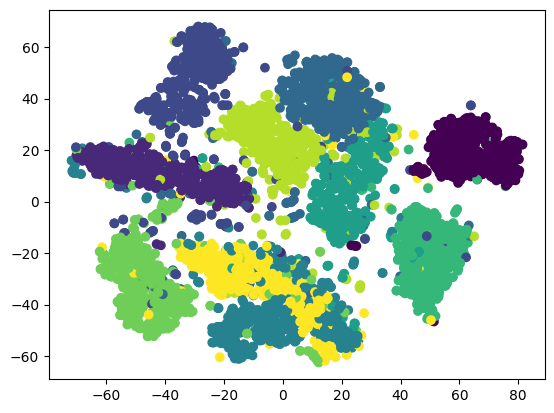

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# `c` argument needs values between 0 and 1 for the colors
colors = scaler.fit_transform(y_train[:5000].values.reshape(-1, 1))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)

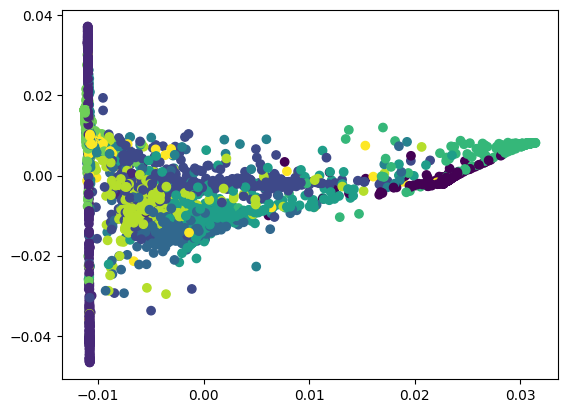

In [22]:
# Let's try LLE
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X_train[:5000])
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=colors)

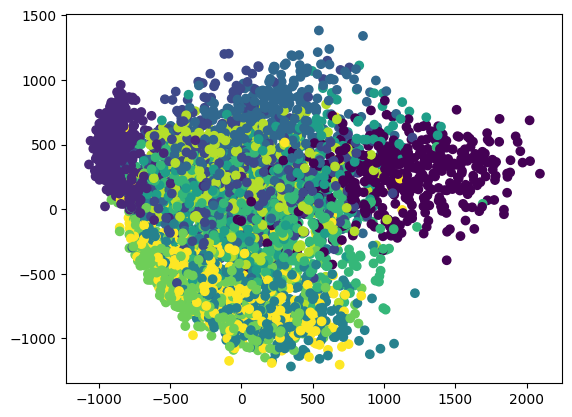

In [23]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train[:5000])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)

t-SNE wins!
Better solution for `c` argument from the book:

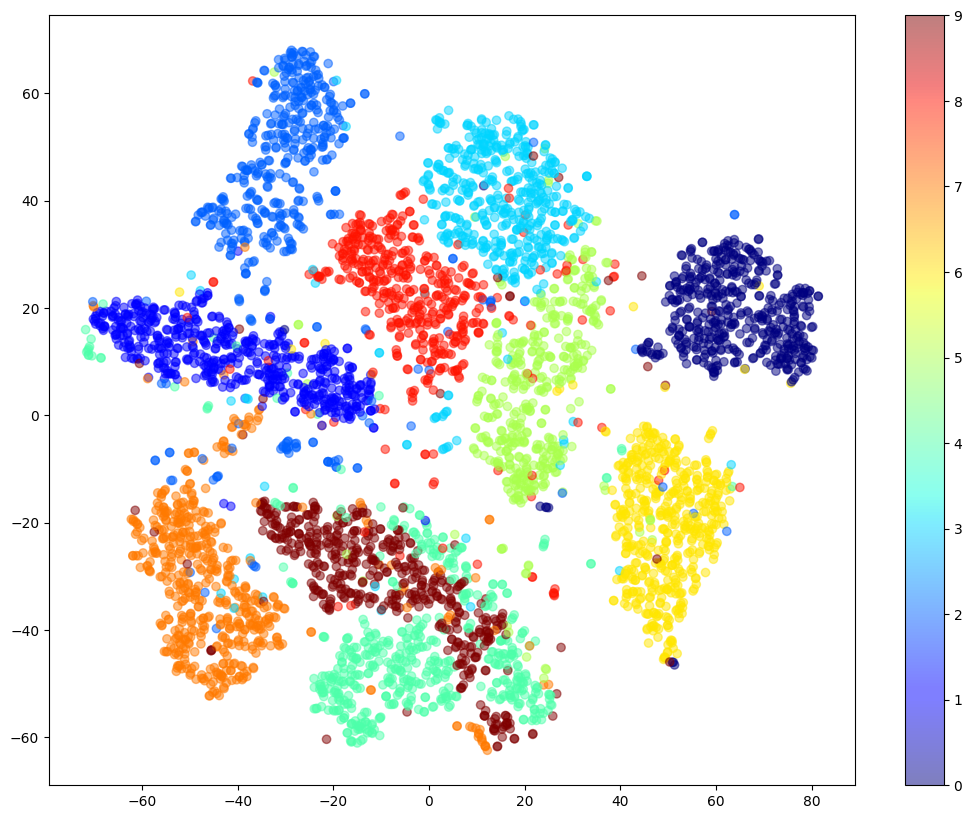

In [28]:
y_sample = y_train[:5000]
plt.figure(figsize=(13, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample.astype(np.int8),
            cmap="jet", alpha=0.5)
plt.colorbar()